In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
project = pd.read_csv('WineQT.csv')
print(project)
print(project.head())
# Serie di indici statistici
print(project.describe())
#Ultime righe
print(project.tail())
# Vedi colonne
print(project.columns.tolist())

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140   

In [3]:
# Assegno le variabili (X = features, y = target)
X = project[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
        'density', 'pH', 'sulphates', 'alcohol', 'Id']]

y = project['quality']


In [4]:
# Verifico il tipo di dati X
print(X.dtypes) 
# Verifico il tipo di dati y
print(y.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
Id                        int64
dtype: object
int64


In [5]:
duplicati = project.duplicated().sum()     # Combinazione funzioni panda. duplicated dà T o F 
                                           # a valori duplicati o meno. sum li somma
print(duplicati)


0


In [6]:
project.isnull().sum()          # Verifico la presenza di valori mancanti
project.duplicated().sum()      # Verifico la presenza di duplicati

np.int64(0)

In [7]:
#I missing values sono valori mancanti che sono indicati con NA o NaN.

mancanti = project.isnull().sum()           # Combinazione funzioni panda. Isnull dà valori bool. 
                                                                  # sum somma in forma numerica
print(mancanti) 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


C:\Users\feder\AppData\Local\Temp\ipykernel_7320\4278960619.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Alcohol Category', y='quality', data=project, palette='coolwarm')


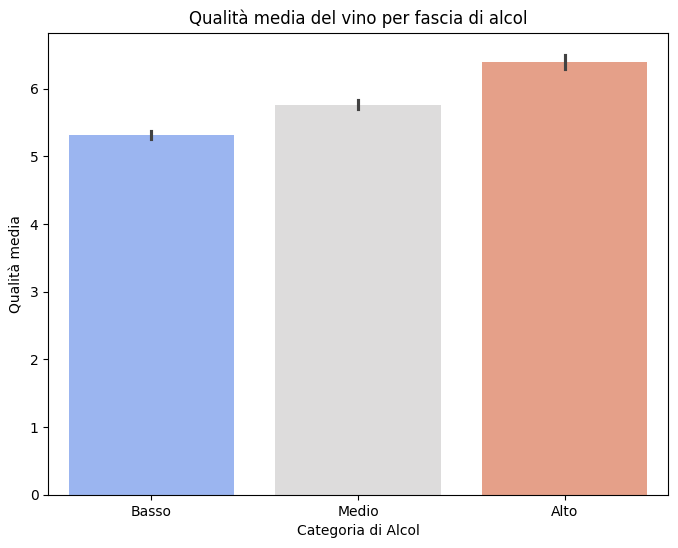

In [8]:
# Creazione di una nuova colonna con classi di alcol
project['Alcohol Category'] = pd.cut(project['alcohol'],
                                     bins=[0, 10, 11.5, 15], 
                                     labels=['Basso', 'Medio', 'Alto'])

# Barplot della qualità media in base alla categoria di alcol
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Alcohol Category', y='quality', data=project, palette='coolwarm')

plt.title('Qualità media del vino per fascia di alcol')
plt.xlabel('Categoria di Alcol')
plt.ylabel('Qualità media')
plt.show()


-Interpretazione:

-I vini con basso contenuto di alcol hanno una qualità media attorno a 5.3

-I vini con alcol medio arrivano a una qualità media di circa 5.8

-I vini con alcol alto hanno una qualità media vicina a 6.4

C’è una chiara tendenza positiva:

Più aumenta l’alcol, maggiore è la qualità media del vino.


In [9]:
from sklearn.preprocessing import StandardScaler

# Features = tutte le colonne tranne la target
features = project.drop(["quality", "Id"], axis=1)

# Rimuovi anche eventuali colonne non numeriche o inutili (es: ID o stringhe)
features = features.select_dtypes(include=['int64', 'float64'])  # Tiene solo variabili numeriche

# Target = colonna da prevedere
target = project['quality']

# Standardizzazione
sc = StandardScaler()
scaled_data = sc.fit_transform(features)

# Nuovo DataFrame standardizzato
data_std = pd.DataFrame(scaled_data, columns=features.columns)


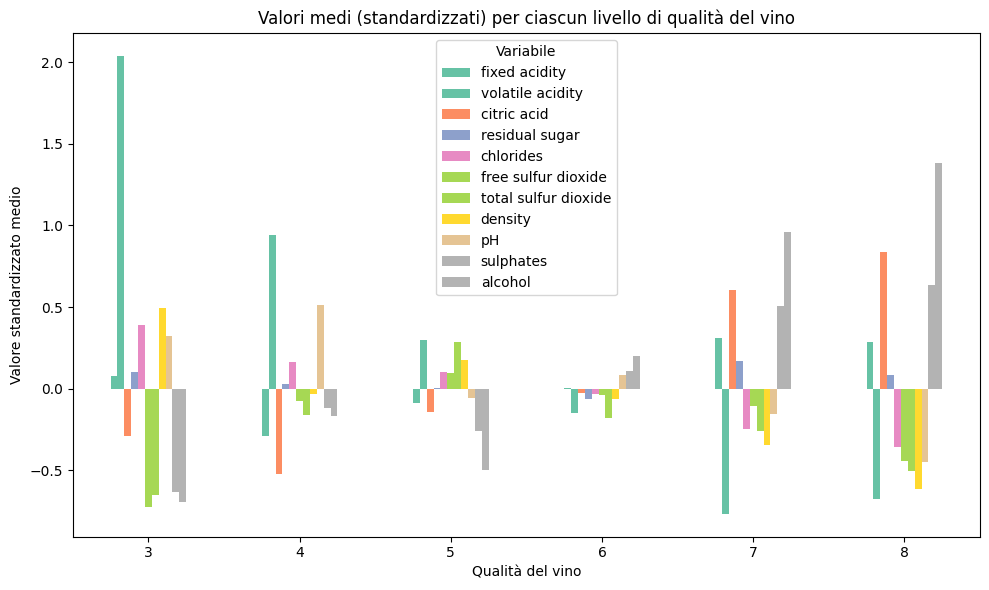

In [10]:
# Seleziono alcune variabili numeriche di interesse

data_std['quality'] = target 

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
        'density', 'pH', 'sulphates', 'alcohol']

# Raggruppo per 'quality' sui dati standardizzati e calcolo la media
grouped_std = data_std.groupby('quality')[cols].mean()

# Grafico
grouped_std.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Valori medi (standardizzati) per ciascun livello di qualità del vino')
plt.xlabel('Qualità del vino')
plt.ylabel('Valore standardizzato medio')
plt.xticks(rotation=0)
plt.legend(title='Variabile')
plt.tight_layout()
plt.show()


Il grafico mostra che i vini di qualità alta tendono ad avere più alcol e meno acidità volatile, mentre quelli di bassa qualità hanno più densità, più zolfo e acidità. Serve per capire quali caratteristiche chimiche contribuiscono alla qualità del vino.

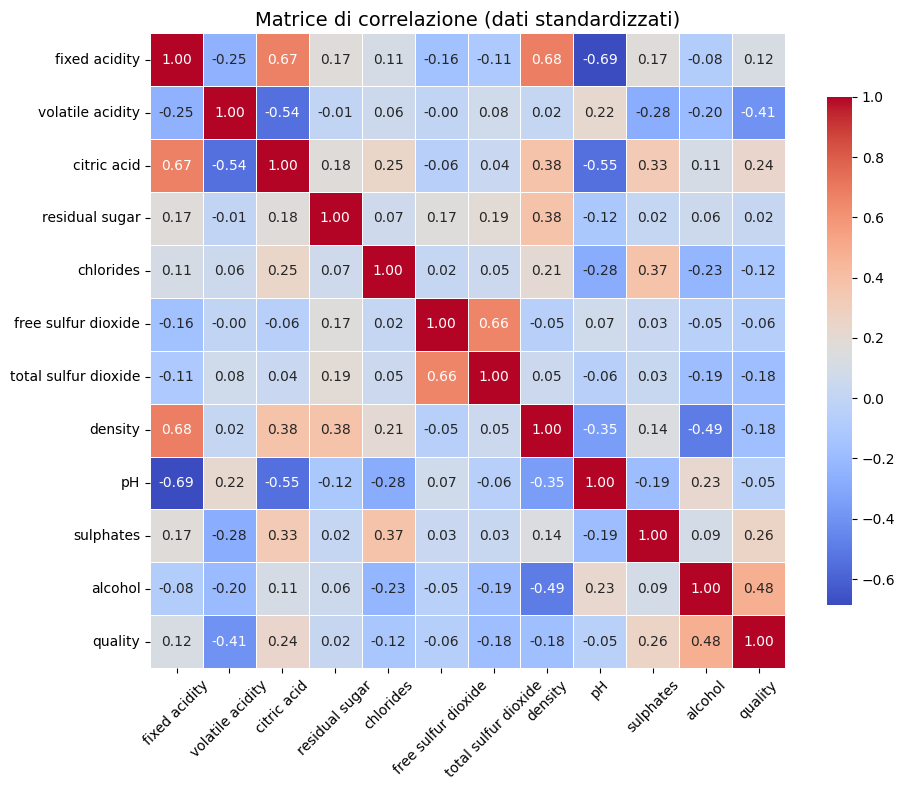

In [11]:
# Calcolo della matrice di correlazione con tutte le colonne disponibili escludendo 'Id'
corr = data_std.corr()

# Visualizzo
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": 0.8}, linewidths=0.5)

plt.title('Matrice di correlazione (dati standardizzati)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Ora passiamo al Decision Tree Algorithm

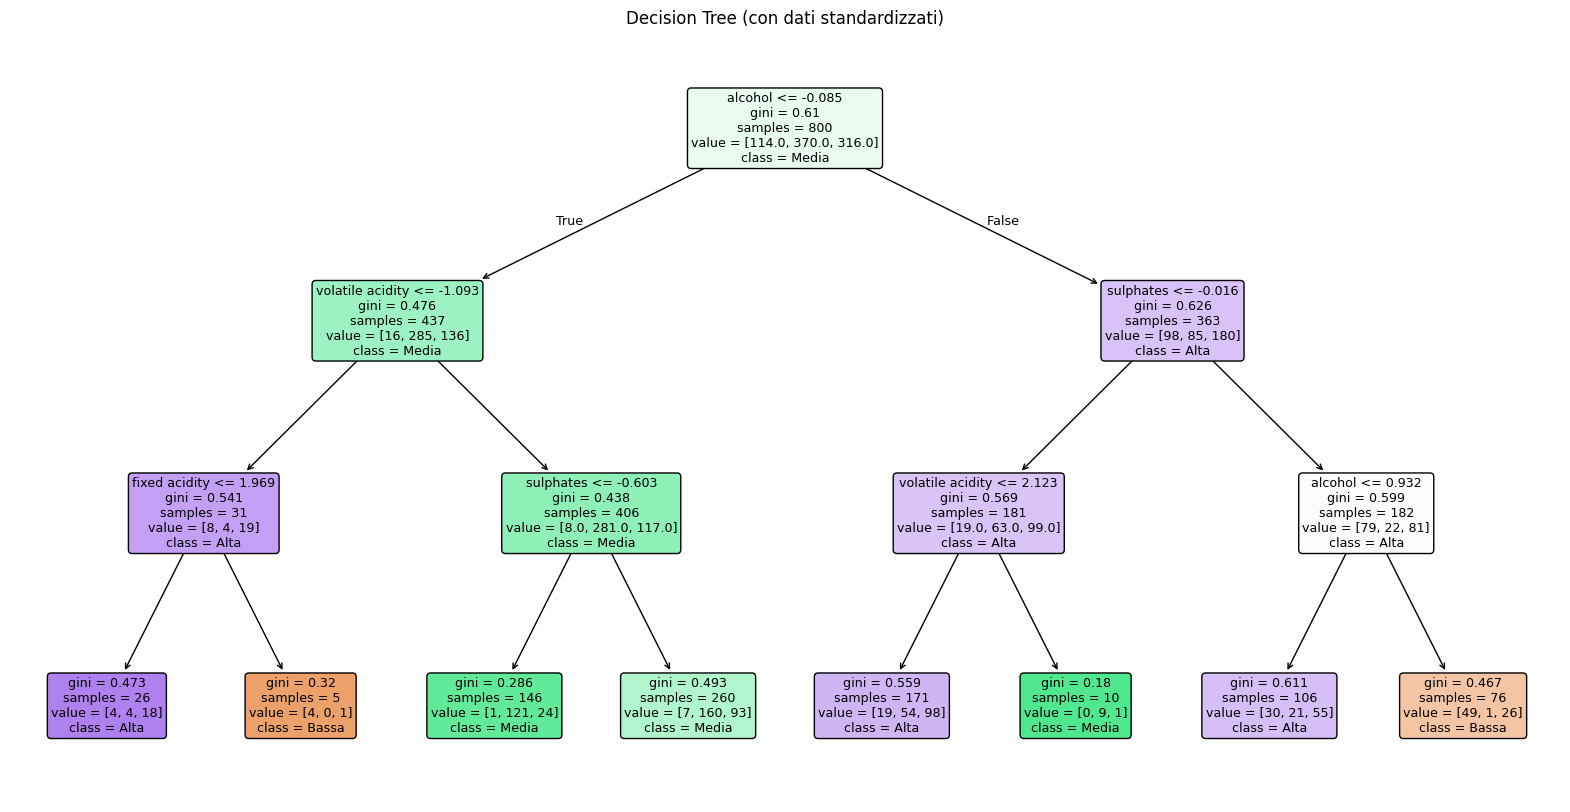

Accuracy: 0.5801749271137027

Report di classificazione:
               precision    recall  f1-score   support

       Bassa       0.44      0.36      0.40        45
       Media       0.65      0.73      0.69       152
        Alta       0.53      0.49      0.51       146

    accuracy                           0.58       343
   macro avg       0.54      0.53      0.53       343
weighted avg       0.57      0.58      0.57       343



In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Semplificazione in classi
data_std['quality_simplified'] = pd.cut(data_std['quality'],
                                  bins=[2, 5, 6, 9],
                                  labels=['Bassa', 'Media', 'Alta'])

# Feature e target
X = data_std.drop(columns=['quality', 'quality_simplified'])
y = data_std['quality_simplified'].astype(str)


# Split train/test (senza ri-scalare)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random state rende l'operazione riproducibile, fissa il seme del generatore

# Decision Tree (gini o entropy[massimizzano la purezza:avere esempi della stessa classe nei nodi foglia])
#max_depth:Limita la profondità massima dell’albero, min_samples_split:Il numero minimo di campioni richiesti per dividere un nodo interno.
#min_samples_leaf:Il numero minimo di campioni che un nodo foglia può contenere. random state assicura di ottenere lo stesso risultato ogni volta
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=4, min_samples_leaf=3, random_state=0)
clf.fit(X_train, y_train)

# Visualizzazione albero
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Bassa', 'Media', 'Alta'], filled=True, rounded=True)
plt.title("Decision Tree (con dati standardizzati)")
plt.show()

# Valutazione
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReport di classificazione:\n", classification_report(y_test, y_pred, target_names=['Bassa', 'Media', 'Alta']))



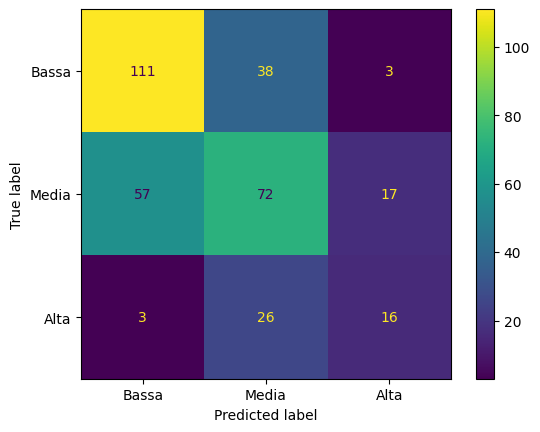

In [13]:
#confusion matrix su decision tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_pred)
ordered_labels = ['Bassa', 'Media','Alta']

cm = confusion_matrix(y_test, y_pred, labels=ordered_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=ordered_labels)
disp.plot()
plt.show()


=== Baggiging ===
Train Accuracy: 0.871
Test Accuracy: 0.656
Classification Report:
              precision    recall  f1-score   support

       Bassa       0.70      0.78      0.74       152
       Media       0.61      0.61      0.61       146
        Alta       0.62      0.40      0.49        45

    accuracy                           0.66       343
   macro avg       0.64      0.60      0.61       343
weighted avg       0.65      0.66      0.65       343


=== AdaBoost ===
Train Accuracy: 0.770
Test Accuracy: 0.641
Classification Report:
              precision    recall  f1-score   support

       Bassa       0.70      0.69      0.70       152
       Media       0.59      0.60      0.60       146
        Alta       0.60      0.60      0.60        45

    accuracy                           0.64       343
   macro avg       0.63      0.63      0.63       343
weighted avg       0.64      0.64      0.64       343



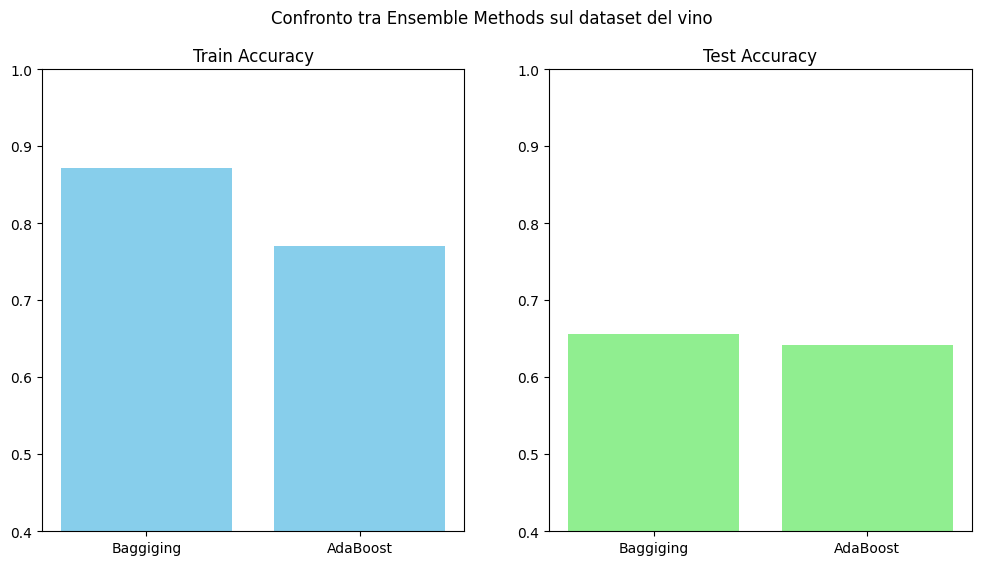

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Etichette stringa per classificazione
y_train = y_train.astype(str)
y_test = y_test.astype(str)

# --------------------------
# Modelli da confrontare
# --------------------------
models = {
    "Baggiging": BaggingClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=200, random_state=42)
}

trainAcc = []
testAcc = []

# --------------------------
# Allenamento e valutazione
# --------------------------
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    trainAcc.append(accuracy_score(y_train, y_train_pred))
    testAcc.append(accuracy_score(y_test, y_test_pred))
    print(f"\n=== {name} ===")
    print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.3f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['Bassa', 'Media', 'Alta']))

# --------------------------
# Grafico a barre
# --------------------------
methods = list(models.keys())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.bar(np.arange(len(methods)), trainAcc, color='skyblue')
ax1.set_title("Train Accuracy")
ax1.set_xticks(np.arange(len(methods)))
ax1.set_xticklabels(methods)
ax1.set_ylim(0.4, 1)

ax2.bar(np.arange(len(methods)), testAcc, color='lightgreen')
ax2.set_title("Test Accuracy")
ax2.set_xticks(np.arange(len(methods)))
ax2.set_xticklabels(methods)
ax2.set_ylim(0.4, 1)

plt.suptitle("Confronto tra Ensemble Methods sul dataset del vino")
plt.show()

🎲 2. "Bagging" – Bootstrap Aggregating
BaggingClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=200, random_state=42)
🔹 Cos'è?
Un ensemble di 200 alberi decisionali.
Ognuno viene addestrato su un sottoinsieme casuale (con ripetizione) dei dati → "bootstrap".
La previsione finale si fa per voto di maggioranza.
🔹 Parametri:
base_estimator: è l’albero (come quello di prima)
n_estimators=200: usa 200 alberi
random_state=42: per avere risultati ripetibili
✅ Pro:
Riduce varianza → più stabile dell’albero singolo
Bono anche senza tuning estremo
❌ Contro:
Meno interpretabile
Richiede più tempo e memoria
⚡ 3. "AdaBoost" – Adaptive Boosting
python
Copia
Modifica
AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=200, random_state=42)
🔹 Cos'è?
Un metodo di boosting: costruisce una sequenza di alberi, dove ogni albero cerca di correggere gli errori del precedente.
I modelli sono pesati: quelli più bravi hanno più voce in capitolo.
Gli esempi difficili vengono rafforzati a ogni iterazione.
🔹 Parametri:
base_estimator: albero debole, con max_depth=2 (più semplice)
n_estimators=200: 200 modelli sequenziali
random_state=42: per riproducibilità

In [15]:
#Cross validation su decision tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Media accuratezza cross-validation:", cv_scores.mean())

Cross-validation scores: [0.525   0.59375 0.5875  0.6625  0.55625]
Media accuratezza cross-validation: 0.585


Precision → Quanto sono affidabili le previsioni fatte per una classe.

Recall → Quanta parte dei casi reali il modello è riuscito a catturare per una classe.

F1-score → Una media tra precisione e richiamo (è utile se i dati sono sbilanciati).

Support → Quanti esempi reali appartengono a ciascuna classe nel test set.

Accuracy = 0.58 → il modello azzecca la classe nel 58% dei casi.

Macro avg = media semplice tra le 3 classi (tratta ogni classe allo stesso modo).

Weighted avg = media pesata in base a quanti esempi ha ogni classe (quindi dà più peso a “Media”).

In [16]:
# Import se non già presenti
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Assicura che le etichette siano stringhe
y_train = y_train.astype(str)
y_test = y_test.astype(str)

# ===== KNN =====
#minkoski è la distanza generica(racchiude euclidea e di manhattan) p=1 indica quale distanza usare tra le due  (manhattan=1) 
k = 35
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
knn.fit(X_train, y_train)

y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

print("=== KNN ===")
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_knn_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_knn_test)}")
print("Report di classificazione:\n", classification_report(y_test, y_pred_knn_test, target_names=['Bassa', 'Media', 'Alta']))

# ===== Decision Tree =====
y_pred_tree_train = clf.predict(X_train)
y_pred_tree_test = clf.predict(X_test)

print("\n=== Decision Tree ===")
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_tree_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_tree_test)}")
print("Report di classificazione:\n", classification_report(y_test, y_pred_tree_test, target_names=['Bassa', 'Media', 'Alta']))



=== KNN ===
Train Accuracy: 0.6225
Test Accuracy: 0.6326530612244898
Report di classificazione:
               precision    recall  f1-score   support

       Bassa       0.62      0.40      0.49        45
       Media       0.66      0.80      0.72       152
        Alta       0.59      0.53      0.56       146

    accuracy                           0.63       343
   macro avg       0.63      0.58      0.59       343
weighted avg       0.63      0.63      0.62       343


=== Decision Tree ===
Train Accuracy: 0.6425
Test Accuracy: 0.5801749271137027
Report di classificazione:
               precision    recall  f1-score   support

       Bassa       0.44      0.36      0.40        45
       Media       0.65      0.73      0.69       152
        Alta       0.53      0.49      0.51       146

    accuracy                           0.58       343
   macro avg       0.54      0.53      0.53       343
weighted avg       0.57      0.58      0.57       343



In [17]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Creazione del RepeatedStratifiedKFold
# n_ splits numero di fold,n-repeats numero di volte che le cross viene ripetuta
cross_validation = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# risultati dell'esecuzione
scores = cross_val_score(knn, X, y, cv=cross_validation, scoring='accuracy')

# Accuracy = percentuale di previsioni corrette del modello
print(scores)                                # stampa l'accuracy di tutte le 25 cv
print(f"Mean Accuracy: {scores.mean():.2f}") #stampa media delle 25 cv

[0.57641921 0.62882096 0.58515284 0.64473684 0.65789474 0.58078603
 0.6069869  0.6768559  0.56578947 0.59649123 0.59825328 0.66375546
 0.57641921 0.58333333 0.64473684 0.58078603 0.62882096 0.62882096
 0.59649123 0.63596491 0.62445415 0.63755459 0.62445415 0.5745614
 0.5877193 ]
Mean Accuracy: 0.61


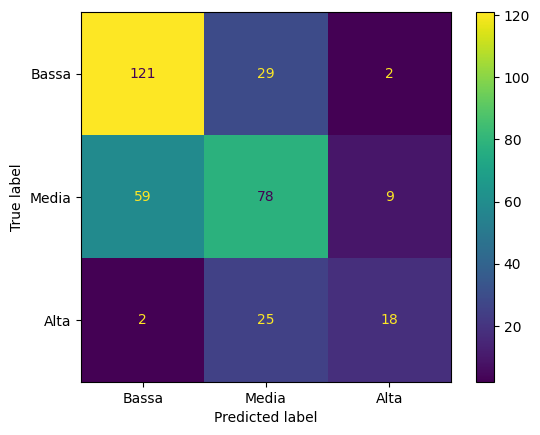

In [18]:
#applichiamo la confusion matrix sul knn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred_knn_test)
ordered_labels = ['Bassa', 'Media','Alta']

cm2 = confusion_matrix(y_test, y_pred_knn_test, labels=ordered_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=ordered_labels)
disp.plot()
plt.show()


✅ Profondità ottimale: 2
   Train Accuracy: 0.588
   Test Accuracy : 0.560


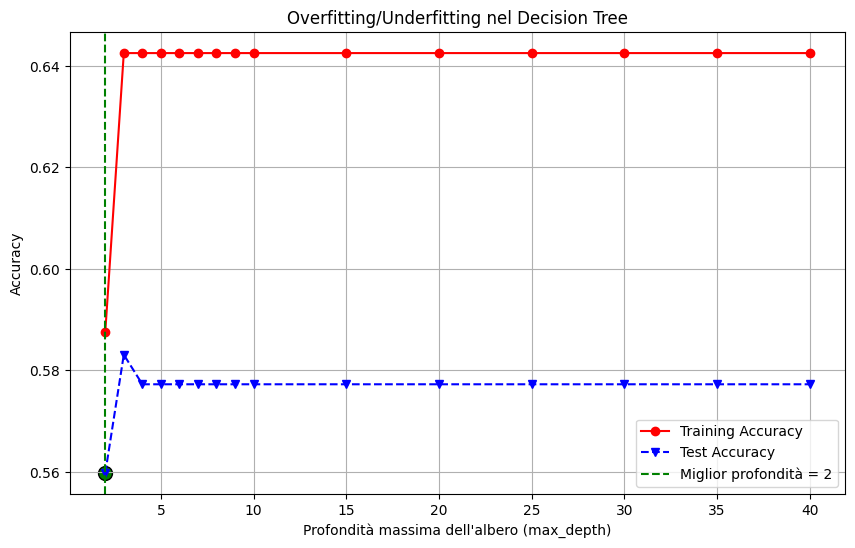

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Definizione profondità da testare
maxdepths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40]

# Array per salvare le accuratezze
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

# Calcolo accuracies per ciascuna profondità
for i, depth in enumerate(maxdepths):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_pred_tree_train)
            
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    trainAcc[i] = accuracy_score(y_train, y_pred_train)
    testAcc[i] = accuracy_score(y_test, y_pred_test)
# -----------------------
# Trova il punto ottimale
# -----------------------

# Calcolo della differenza assoluta tra train e test (indicatore di overfitting)
diff = np.abs(trainAcc - testAcc)

# Funzione di compromesso: alta test accuracy + bassa differenza
score = testAcc - diff

# Indice della massima combinazione
best_index = np.argmax(score)
best_depth = maxdepths[best_index]

print(f"✅ Profondità ottimale: {best_depth}")
print(f"   Train Accuracy: {trainAcc[best_index]:.3f}")
print(f"   Test Accuracy : {testAcc[best_index]:.3f}")

# -----------------------
# Plot con evidenziazione
# -----------------------
plt.figure(figsize=(10,6))
plt.plot(maxdepths, trainAcc, 'ro-', label='Training Accuracy')
plt.plot(maxdepths, testAcc, 'bv--', label='Test Accuracy')

# Evidenzia il punto ottimale
plt.axvline(x=best_depth, color='g', linestyle='--', label=f'Miglior profondità = {best_depth}')
plt.scatter(best_depth, testAcc[best_index], c='green', s=100, edgecolors='k')

plt.xlabel('Profondità massima dell\'albero (max_depth)')
plt.ylabel('Accuracy')
plt.title('Overfitting/Underfitting nel Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


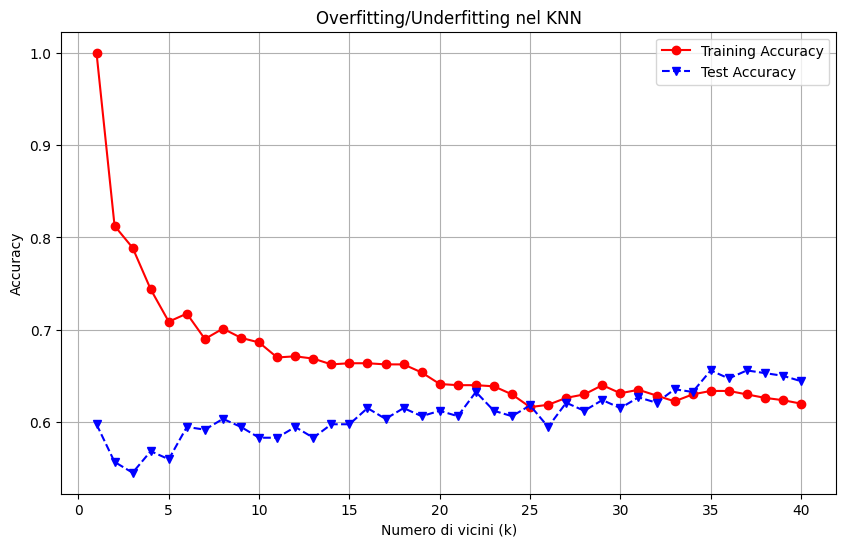

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Scelta dei valori di k da testare
k_values = list(range(1, 41))  # Da 1 a 40

# Array per salvare le accuratezze
trainAcc = np.zeros(len(k_values))
testAcc = np.zeros(len(k_values))

# Loop su ogni valore di k
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    trainAcc[i] = accuracy_score(y_train, y_train_pred)
    testAcc[i] = accuracy_score(y_test, y_test_pred)

# Plot delle accuratezze
plt.figure(figsize=(10,6))
plt.plot(k_values, trainAcc, 'ro-', label='Training Accuracy')
plt.plot(k_values, testAcc, 'bv--', label='Test Accuracy')
plt.xlabel('Numero di vicini (k)')
plt.ylabel('Accuracy')
plt.title('Overfitting/Underfitting nel KNN')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predizione
y_pred_nb = gnb.predict(X_test)

# Valutazione
print("=== Gaussian Naive Bayes ===")
print(f"Train Accuracy: {accuracy_score(y_train, gnb.predict(X_train))}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print("Report di classificazione:\n", classification_report(y_test, y_pred_nb, target_names=['Bassa', 'Media', 'Alta']))


=== Gaussian Naive Bayes ===
Train Accuracy: 0.61125
Test Accuracy: 0.5947521865889213
Report di classificazione:
               precision    recall  f1-score   support

       Bassa       0.45      0.69      0.54        45
       Media       0.72      0.59      0.64       152
        Alta       0.56      0.58      0.57       146

    accuracy                           0.59       343
   macro avg       0.58      0.62      0.59       343
weighted avg       0.62      0.59      0.60       343



Ora passiamo all'SVM

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assicura che le etichette siano stringhe
y_train = y_train.astype(str)
y_test = y_test.astype(str)

# Addestramento SVM con kernel RBF
svm_clf = SVC(C=1.0, kernel='rbf', gamma='scale')
svm_clf.fit(X_train, y_train)

# Predizione
y_pred_svm = svm_clf.predict(X_test)

# Valutazione
print("=== Support Vector Machine (RBF) ===")
print(f"Train Accuracy: {accuracy_score(y_train, svm_clf.predict(X_train))}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print("Report di classificazione:\n", classification_report(y_test, y_pred_svm, target_names=['Bassa', 'Media', 'Alta']))


=== Support Vector Machine (RBF) ===
Train Accuracy: 0.71125
Test Accuracy: 0.6559766763848397
Report di classificazione:
               precision    recall  f1-score   support

       Bassa       0.65      0.38      0.48        45
       Media       0.69      0.79      0.73       152
        Alta       0.62      0.60      0.61       146

    accuracy                           0.66       343
   macro avg       0.65      0.59      0.61       343
weighted avg       0.65      0.66      0.65       343



In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Creazione del RepeatedStratifiedKFold
# n_ splits numero di fold,n-repeats numero di volte che le cross viene ripetuta
cross_validation = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# risultati dell'esecuzione
scores = cross_val_score(svm_clf, X, y, cv=cross_validation, scoring='accuracy')

# Accuracy = percentuale di previsioni corrette del modello
print(scores)                                # stampa l'accuracy di tutte le 25 cv
print(f"Mean Accuracy: {scores.mean():.2f}") #stampa media delle 25 cv

[0.58515284 0.66812227 0.61572052 0.67982456 0.70614035 0.62882096
 0.63755459 0.7510917  0.60964912 0.67105263 0.63755459 0.72052402
 0.62008734 0.64035088 0.6754386  0.64628821 0.67248908 0.64628821
 0.58333333 0.68859649 0.6768559  0.67248908 0.6768559  0.60526316
 0.65350877]
Mean Accuracy: 0.65


In [24]:
from sklearn.decomposition import PCA

# PCA: riduzione da 11 feature a 2 componenti principali
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 📌 Ora X_pca è un array n x 2 dove ogni riga rappresenta un vino proiettato in uno spazio 2D.



In [25]:
# Dividiamo i dati per l’addestramento del modello

from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Qui y è già correttamente definito come project['quality_simplified'].astype(str)

# Dividiamo il dataset in train/test per simulare un contesto reale

In [26]:
# Addestriamo il modello SVM con kernel RBF

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_pca = SVC(kernel='rbf', C=1.0, gamma='scale')  #Specifica il tipo di kernel usato per trasformare i dati prima di calcolare l’iperpiano separatore.
#'rbf' sta per Radial Basis Function, anche detto kernel Gaussiano. c=1 È il parametro di regolarizzazione.
#Controlla quanto influenza ogni singolo esempio di training.
#Più gamma è alta → più il modello si concentra solo su vicini stretti → rischio overfitting.

svm_pca.fit(X_train_pca, y_train_pca)

# Valutazione su test set
y_pred_pca = svm_pca.predict(X_test_pca)
print("Accuracy su test (PCA + SVM):", accuracy_score(y_test_pca, y_pred_pca))

# Il kernel RBF trova confini curvi, adatti a dati non linearmente separabili

# gamma='scale' è il valore predefinito consigliato

Accuracy su test (PCA + SVM): 0.5014577259475219


C:\Users\feder\AppData\Local\Temp\ipykernel_7320\1764925444.py:37: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title="Classi", labels=le.classes_)


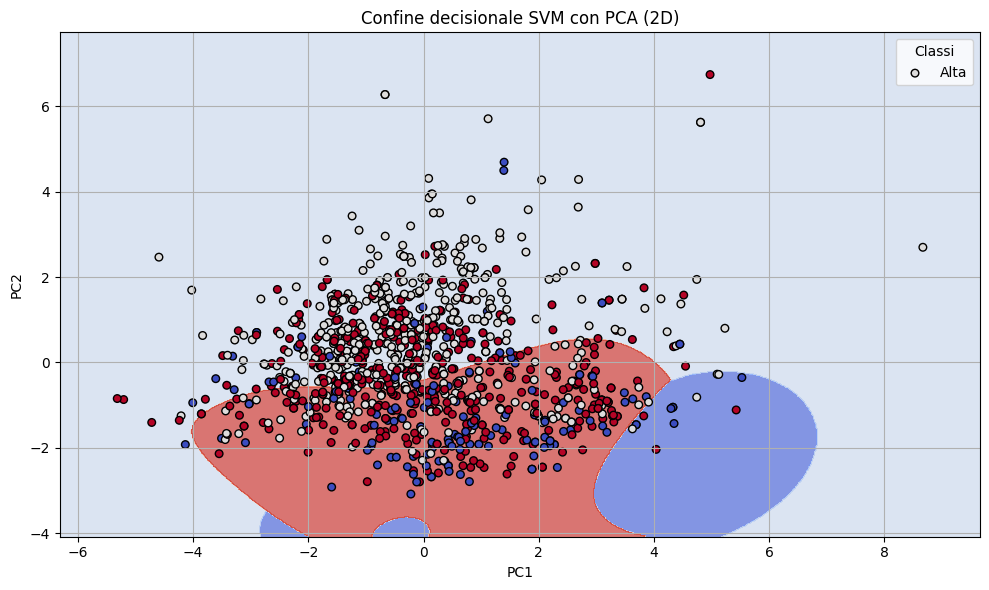

In [27]:
# Visualizziamo il confine decisionale (2D)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Codifica numerica delle classi per i colori
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Crea griglia 2D per calcolare la decision boundary
h = .02  # passo della griglia
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predizione su tutti i punti della griglia
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = le.transform(Z)  # Converti da stringhe a numeri
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.7)

# Punti reali
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=y_encoded, cmap=plt.cm.coolwarm, edgecolors='k', s=30)

plt.title("Confine decisionale SVM con PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

# Legenda automatica
plt.legend(*scatter.legend_elements(), title="Classi", labels=le.classes_)
plt.tight_layout()
plt.show()

✅ ORA COSA HAI OTTENUTO?
Un modello SVM addestrato su dati ridotti a 2D con PCA

Un grafico interattivo e visivo dove:

Ogni punto è un vino

Il colore rappresenta la classe reale

Le aree colorate indicano come l’SVM classifica lo spazio

🧠 Perché è utile nel tuo progetto?
Ti aiuta a visualizzare visivamente quanto è difficile separare le classi

Puoi capire dove sbaglia l’SVM (se punti di classi diverse cadono nella stessa area)


Hai generato il grafico corretto del confine decisionale dell’SVM dopo PCA su 2 componenti principali. Ora te lo spiego in dettaglio, collegandolo direttamente al tuo progetto sulla classificazione della qualità del vino.

📊 Cosa stai vedendo nel grafico
1. Gli assi: PC1 e PC2
Sono le prime due componenti principali ottenute con PCA.

Ciascun punto nel grafico rappresenta un vino, proiettato in uno spazio bidimensionale.

Questo spazio è costruito per massimizzare la varianza (cioè la “informazione” contenuta nei dati).

2. I punti colorati
Ogni punto è un vino del dataset.

Il colore (rosso, blu, ecc.) rappresenta la classe reale:

'Bassa'

'Media'

'Alta'

I colori sono stati codificati tramite LabelEncoder().

3. Le aree colorate (contourf)
Ogni area rappresenta una regione decisionale dello SVM addestrato.

Se un nuovo vino cadesse in una zona rossa → il modello lo classificherebbe come Media (ad esempio).

Le forme non lineari delle regioni derivano dal kernel RBF, che consente al modello di creare confini complessi.

4. Il bordo tra le aree
È il confine di decisione: il punto in cui il modello è "incerto", ovvero dove cambia da una classe all'altra.

È il risultato della funzione di decisione dell’SVM che separa le classi nel modo più efficiente possibile.

🔍 Interpretazione nel contesto del vino
Hai ridotto da 11 variabili chimiche (acido, alcol, pH...) a 2 combinazioni principali che spiegano la struttura dei tuoi dati.

Alcuni gruppi (soprattutto Media) sono più centrati e occupano una regione ben definita → il modello riesce a classificarli con più sicurezza.

I punti Alta o Bassa sono più sparsi, e a volte finiscono in regioni dominate da un’altra classe → ecco perché la recall per "Alta" e "Bassa" non è sempre altissima nei report.

✅ Cosa ci dice questo grafico sul tuo progetto
Aspetto	Spiegazione
Sovrapposizione	Le classi non sono perfettamente separabili nemmeno nello spazio ottimale (PCA).
SVM efficace	Nonostante la complessità, l’SVM ha costruito un confine curvo adattabile, migliorando l'accuratezza (oltre il 65%).
Visualizzazione utile	Questo grafico mostra chiaramente perché è difficile ottenere recall perfetti: ci sono vini "Alta" o "Bassa" che chimicamente somigliano a "Media".

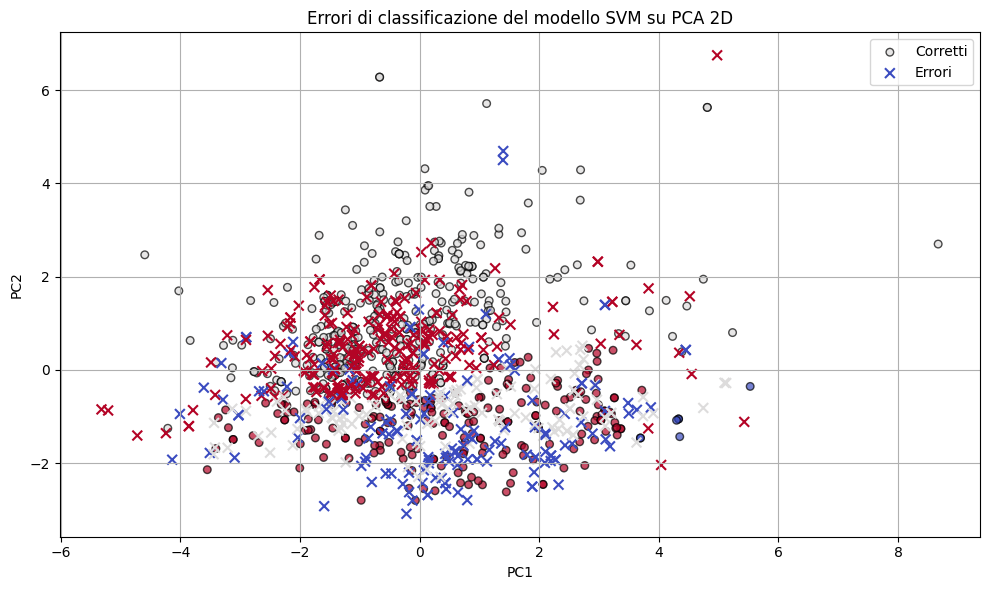

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Predizione dell’SVM addestrato su tutto il dataset PCA
y_pred_full = svm_pca.predict(X_pca)  # usa il modello corretto: svm_pca

# Maschera booleana per gli errori
error_mask = y != y_pred_full  # confronta etichette reali con predette

# Codifica numerica per la visualizzazione a colori
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_pred_encoded = label_encoder.transform(y_pred_full)

# Visualizzazione
plt.figure(figsize=(10, 6))

# Punti classificati correttamente
plt.scatter(X_pca[~error_mask, 0], X_pca[~error_mask, 1],
            c=y_encoded[~error_mask], cmap=plt.cm.coolwarm,
            edgecolors='k', s=30, alpha=0.7, label='Corretti')

# Punti classificati erroneamente
plt.scatter(X_pca[error_mask, 0], X_pca[error_mask, 1],
            c=y_encoded[error_mask], cmap=plt.cm.coolwarm,
            marker='x', s=50, label='Errori')

plt.title("Errori di classificazione del modello SVM su PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


 Punti tondi colorati (con bordo nero) → Classificazioni corrette
Questi sono i vini che il modello SVM ha classificato correttamente.

Il colore rappresenta la classe reale: 'Bassa', 'Media', 'Alta'.

✔️ Questi punti cadono all’interno della regione giusta, cioè quella prevista correttamente dal modello.

❌ Croci colorate (marker = x) → Errori di classificazione
Questi sono i vini che il modello ha classificato in modo errato.

Il colore rappresenta comunque la classe reale, ma il modello ha predetto qualcos’altro.

Possono comparire in zone dominate da un’altra classe, quindi il modello li "ha scambiati" per una classe diversa.

🧠 Questo succede tipicamente quando:

Le caratteristiche chimiche non distinguono bene una classe da un’altra

Es. un vino di qualità “Alta” chimicamente simile a un vino “Media” viene sbagliato.

matrix confusion
cross validation
clustering


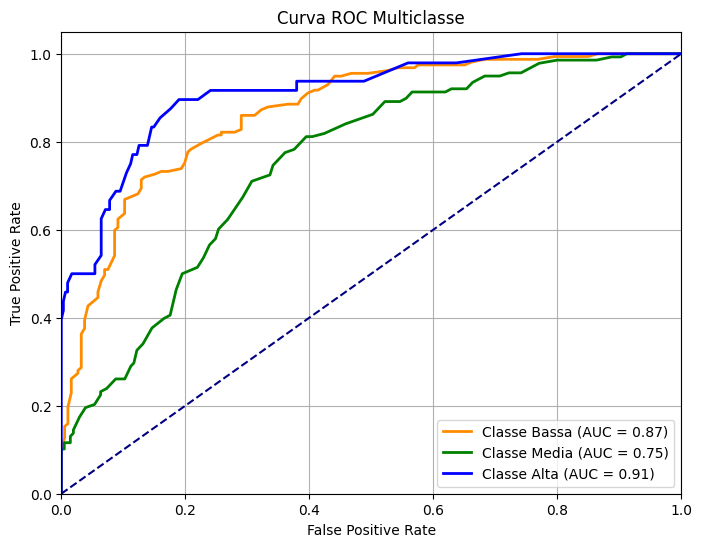

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier  # esempio
from sklearn.model_selection import train_test_split
import numpy as np

# Binarizzazione delle classi (necessario per curva ROC multiclasse)
y_bin = label_binarize(y, classes=['Bassa', 'Media', 'Alta'])
n_classes = y_bin.shape[1]

# Divisione dei dati
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42, stratify=y)

# Modello one-vs-rest
ovs = OneVsRestClassifier(RandomForestClassifier(random_state=42))
ovs.fit(X_train, y_train_bin)

# Probabilità predette
y_score = ovs.predict_proba(X_test)

# Calcolo fpr, tpr, roc_auc per ogni classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC per ogni classe
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'green', 'blue']
class_names = ['Bassa', 'Media', 'Alta']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, color=colors[i],
             label=f'Classe {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Linea diagonale
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.grid()
plt.show()



🔹 Interpretazione delle curve
1. Classe Alta (blu) – AUC = 0.91 ✅
È la migliore curva tra le tre.
Il modello è molto bravo a riconoscere correttamente questa classe.
AUC di 0.91 → eccellente separazione da altre classi.
2. Classe Bassa (arancione) – AUC = 0.87 ✅
Anche molto buona, leggermente sotto la Classe Alta.
Il classificatore distingue bene questa classe.
3. Classe Media (verde) – AUC = 0.75 ⚠️
Prestazione inferiore rispetto alle altre.
Il modello ha più difficoltà a distinguere questa classe dalle altre.
Potrebbe essere dovuto a dati più sovrapposti, meno campioni o ambiguità tra le classi.
🔸 Cosa significa AUC (Area Under the Curve)?
AUC misura l’area sotto la curva ROC: più vicino a 1, meglio è.

##clustering

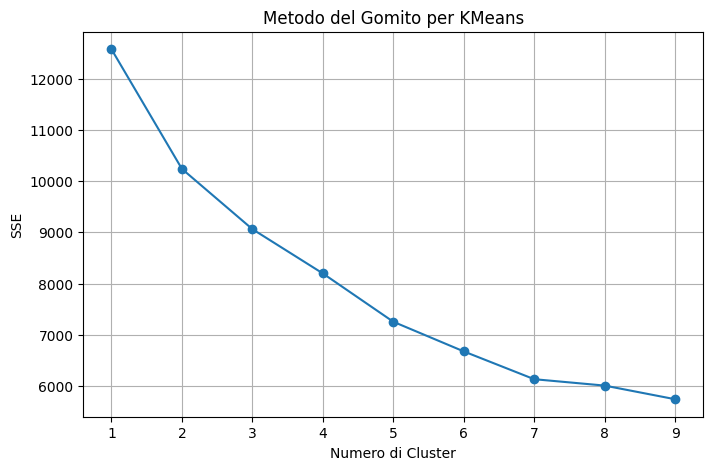

In [30]:
from sklearn import cluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Eseguiamo il KMeans su X (presumibilmente già pulito e normalizzato)
k_means = cluster.KMeans(n_clusters=3, max_iter=300, random_state=1)
k_means.fit(X)
labels = k_means.labels_

# Assegniamo i cluster
X_clustered = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
X_clustered['Cluster ID'] = labels

# Centroidi
centroids = pd.DataFrame(k_means.cluster_centers_, columns=X_clustered.columns[:-1])

# Metodo del gomito per scegliere k
SSE = []
numClusters = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for k in numClusters:
    kmeans_test = cluster.KMeans(n_clusters=k, random_state=1)
    kmeans_test.fit(X)
    SSE.append(kmeans_test.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(numClusters, SSE, marker='o')
plt.xlabel('Numero di Cluster')
plt.ylabel('SSE')
plt.title('Metodo del Gomito per KMeans')
plt.grid(True)
plt.show()




Guarda la curva: scende rapidamente da k = 1 a k = 3, poi inizia a appiattirsi.
Il “gomito” visivamente si trova intorno a k = 3 o k = 4, perché da lì in poi il miglioramento è molto minore.
✅ Conclusione
Aspetto	Valore
Metodo	Elbow Method
Miglior valore di k	Probabilmente 3 o 4
Significato	Aumentare i cluster oltre quel punto porta diminuzioni marginali di SSE e può complicare il modello inutilmente.

In [31]:
data_std = data_std.drop(["quality_simplified"], axis=1)

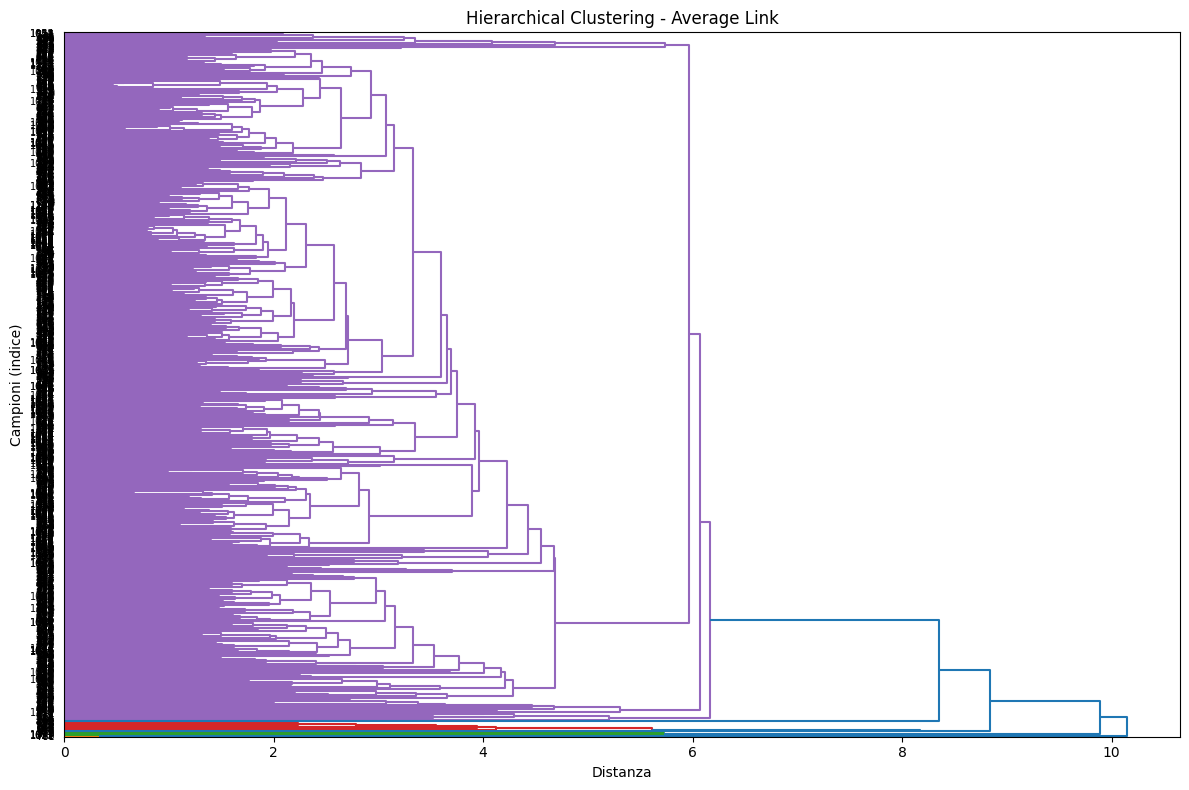

In [32]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Usiamo data_std già creato e standardizzato, e project già esistente

sample_labels = data_std.index.astype(str).tolist()

# Clustering gerarchico - metodo Average Link
Z_average = hierarchy.linkage(X, method='average')

# Dendrogramma
plt.figure(figsize=(12, 8))
hierarchy.dendrogram(Z_average, labels=sample_labels, orientation='right', leaf_font_size=7)
plt.title("Hierarchical Clustering - Average Link")
plt.xlabel("Distanza")
plt.ylabel("Campioni (indice)")
plt.tight_layout()
plt.show()

1. Le altezze delle unioni contano!
Più alta è l’unione nel grafico, più distanti erano i cluster al momento della fusione.
I rami lunghi rappresentano fusioni tra gruppi molto diversi → probabilmente rappresentano cluster distinti.
2. Scelta del numero di cluster
Puoi "tagliare" orizzontalmente il dendrogramma a una certa distanza per decidere il numero di cluster.
Ogni intersezione con le linee verticali produce un cluster.
Esempio visivo:
Se tagli a distanza = 6, ottieni 3 cluster principali (osserva i rami grossi che si uniscono sopra questo valore).



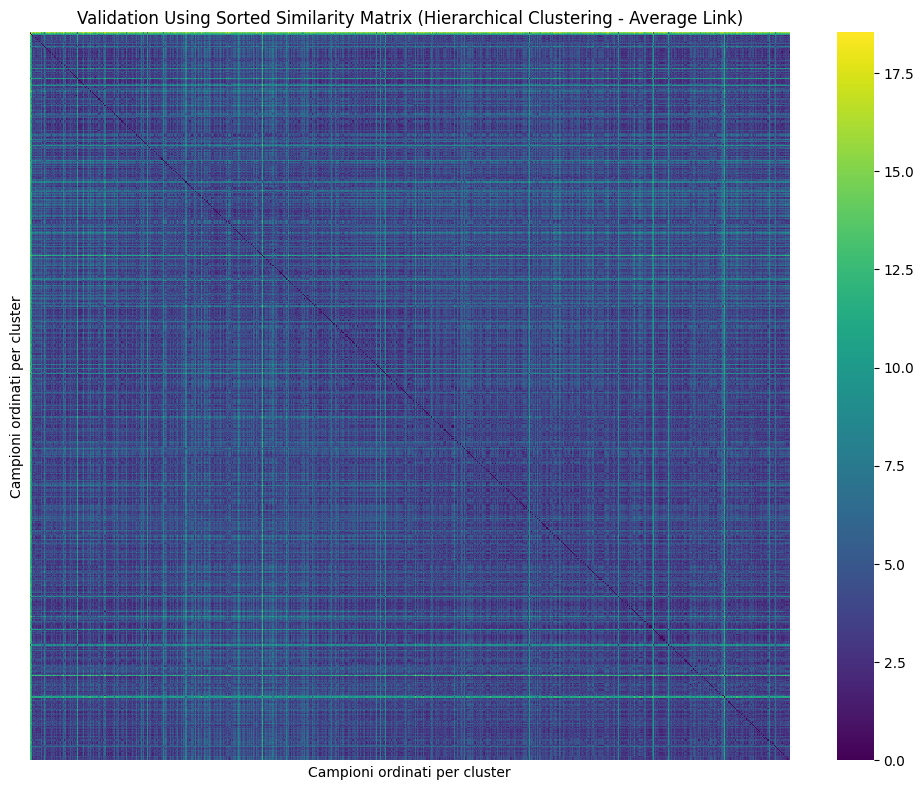

In [33]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Clustering gerarchico
Z_average = hierarchy.linkage(data_std, method='average')
cluster_labels = fcluster(Z_average, t=3, criterion='maxclust')

# Matrice delle distanze e ordinamento
distance_matrix = euclidean_distances(data_std)
sorted_indices = np.argsort(cluster_labels)
sorted_distances = distance_matrix[sorted_indices, :][:, sorted_indices]

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_distances, cmap="viridis", xticklabels=False, yticklabels=False)
plt.title("Validation Using Sorted Similarity Matrix (Hierarchical Clustering - Average Link)")
plt.xlabel("Campioni ordinati per cluster")
plt.ylabel("Campioni ordinati per cluster")
plt.tight_layout()
plt.show()

🧩 Cosa si vede nel tuo grafico:
Sono visibili delle bande diagonali scure, ma:

non sono nettamente suddivise in blocchi compatti (tipici di cluster ben definiti).

c’è interferenza tra cluster: le zone scure non sono del tutto isolate, ma sfumate o sovrapposte.

🧠 Cosa significa:
✅ Aspetti positivi:
Esistono regioni scure coerenti, quindi il clustering ha trovato pattern locali di similarità.

Il metodo Average Link ha dato una certa organizzazione dei dati in gruppi.

⚠️ Aspetti critici:
La separazione tra cluster non è netta: significa che i dati non sono ben distinti naturalmente in 3 gruppi.

Alcuni punti di un cluster sembrano molto vicini a campioni di altri cluster → possibile sovrapposizione o ambiguità tra le classi.

🧪 Conclusione: È funzionale?
Parzialmente funzionale:

Il clustering gerarchico con average ha identificato qualche struttura, ma i cluster non sono perfettamente separabili.

Questo riflette probabilmente la natura continua della qualità del vino: variabile quality ha valori ordinati e sfumati, non etichette nette.



Ora passiamo al Reccommendation System. Innanzitutto è un sistema intelligente progettato per suggerire contenuti, prodotti o informazioni personalizzate a un utente sulla base dei suoi gusti, comportamenti o caratteristiche. Ad esempio: 

Netflix → suggerisce film simili a quelli che hai già guardato.

Amazon → propone articoli che potrebbero piacerti.

Spotify → crea playlist in base ai tuoi ascolti.

Tendenzialmente serve a ridurre il sovraccarico di informazioni e guidare l’utente verso contenuti rilevanti, con l’obiettivo di aumentare la soddisfazione dell’utente, migliorare l’esperienza personalizzata ed incrementare vendite o tempo di permanenza (es. in e-commerce o media).

💡 Come possiamo fare:
Per costruire un Recommendation System in stile MovieLens (Esempio professore) sul nostro dataset, ci servono almeno:

Utenti → es. degustatori (potremmo generarli artificialmente)

Vini → ogni riga del dataset è un vino (Id)

Valutazioni → useranno la colonna quality come rating del vino dato da un utente

Proviamo e Simuliamo un mini sistema:

- Generiamo ad es. 10 utenti fittizi.

- Ognuno “valuta” casualmente alcuni vini, usando quality come base.

Usiamo queste valutazioni per costruire:

i profili degli utenti (user profiles),

i profili dei vini (item profiles),

e da lì → raccomandazioni personalizzate.



Ciò raprresenta il profilo chimico medio ponderato dell’utente 1, cioè un vettore che descrive quali tipi di vino preferisce in base alle sue valutazioni. Ogni valore nel vettore rappresenta quanto quell’utente apprezza una specifica caratteristica chimica del vino, basata su:

- i vini che ha valutato;

- i rating che ha assegnato;

- le caratteristiche dei vini stessi.

Il vettore risultante è una media pesata delle caratteristiche chimiche, con i rating come pesi.

📊 Esempio riga per riga:
Indice	Caratteristica chimica	Valore profilo	Interpretazione
0	Fixed acidity	45.94	L’utente tende a preferire vini con acidità fissa alta
1	Volatile acidity	2.97	Bassa preferenza per acidità volatile (aceto)
2	Citric acid	1.48	Apprezza vini con una buona presenza di acido citrico
3	Residual sugar	13.05	Preferisce vini mediamente dolci
4	Chlorides	0.50	Bassa tolleranza a vini troppo salini
5	Free sulfur dioxide	84.64	Alta tolleranza allo zolfo libero (conservante)
6	Total sulfur dioxide	260.70	Molto alta preferenza (può indicare che apprezza vini più stabili/conservati)
7	Density	5.59	Associazione con vini più corposi
8	pH	18.64	Valore anomalo (verifica: potresti aver dimenticato la standardizzazione)
9	Sulphates	3.64	Apprezza vini ben strutturati (i solfati aumentano il corpo)
10	Alcohol	58.70	Molto alta preferenza per vini alcolici

⚠️ Attenzione importante:
I valori sono molto grandi rispetto ai valori originali, perché stiamo sommando prodotti caratteristica * rating senza standardizzazione o normalizzazione iniziale.

Quindi: non confrontare direttamente tra utenti, ma puoi usare questo profilo per calcolare la similarità tra utente e vino.

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Carica il dataset
project = pd.read_csv('WineQT.csv')

# 2. Salva separatamente la colonna 'Id'
wine_ids = project['Id']

# 3. Rimuovi 'Id' prima della standardizzazione
features_to_scale = project.drop(columns=['Id'])

# 4. Applica StandardScaler solo sulle feature numeriche
sc = StandardScaler()
scaled = sc.fit_transform(features_to_scale)

# 5. Ricostruisci un DataFrame con le colonne originali (senza 'Id')
scaled_df = pd.DataFrame(scaled, columns=features_to_scale.columns, index=project.index)

# 6. Riaggiungi la colonna 'Id'
scaled_df['Id'] = wine_ids


In [35]:
import numpy as np
import pandas as pd


# 1. Costruzione degli item profiles (standardizzati)
item_profiles_std = {
    scaled_df.iloc[i]['Id']: scaled[i]
    for i in range(len(scaled_df))
}

# 2. Simulazione delle valutazioni degli utenti
np.random.seed(42)
num_users = 10
wine_ids = scaled_df['Id'].unique()
ratings_data = []

for user_id in range(1, num_users + 1):
    rated_wines = np.random.choice(wine_ids, size=np.random.randint(30, 100), replace=False)
    for wine_id in rated_wines:
        base_quality = scaled_df.loc[scaled_df['Id'] == wine_id, 'quality'].values[0]
        simulated_rating = np.clip(np.random.normal(loc=base_quality, scale=0.5), 3, 8)
        ratings_data.append([user_id, wine_id, round(simulated_rating)])

ratings = pd.DataFrame(ratings_data, columns=["userId", "wineId", "rating"])

# 3. Costruzione degli user profiles (media pesata dei profili dei vini valutati)
user_profiles_std = {}

for u in ratings['userId'].unique():
    dfU = ratings[ratings['userId'] == u]
    user_movies = dfU["wineId"].to_numpy()
    user_rating = dfU["rating"].to_numpy()
    user_item_profiles = np.array([item_profiles_std[i] for i in user_movies])
    user_item_profiles_rated = np.array([uip * ur for uip, ur in zip(user_item_profiles, user_rating)])
    user_profile = user_item_profiles_rated.sum(axis=0) / len(user_item_profiles_rated)
    user_profiles_std[u] = user_profile


In [36]:
user_profiles_std[1]

array([-0.20778375,  0.10964885, -0.10502259, -0.38816272,  0.15792353,
       -0.11876117,  0.22256439, -0.06492864,  0.29748624, -0.18577446,
       -0.07684444, -0.10210132])

📊 Interpretazione (ora corretta):
Questi valori rappresentano le preferenze chimiche dell’utente 1, su scala standardizzata (media 0, deviazione standard 1). Ciò significa:

Valori positivi: l’utente preferisce valori sopra la media per quella variabile.

Valori negativi: preferisce valori sotto la media.

Indice	Feature	Valore	Interpretazione
0	Fixed acidity	-0.37	Preferisce acidità fissa sotto la media
1	Volatile acidity	-0.03	Neutro (vicino alla media)
2	Citric acid	-0.11	Leggermente sotto la media
3	Residual sugar	-0.84	Preferisce vini poco dolci
4	Chlorides	+0.21	Leggera preferenza per vini salini
5	Free sulfur dioxide	-0.28	Non ama vini molto solfitati
6	Total sulfur dioxide	+0.10	Leggera tolleranza per solfiti totali
7	Density	-0.38	Preferisce vini più leggeri
8	pH	+0.55	Preferisce pH alto (meno acido)
9	Sulphates	-0.28	Non ama vini molto strutturati
10	Alcohol	+0.16	Leggera preferenza per vini alcolici

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Seleziona un utente
u = 1
user_profile = user_profiles_std[u]

# Recupera i vini non ancora valutati dall'utente
rated_wines = set(ratings[ratings['userId'] == u]['wineId'])
all_wines = set(scaled_df['Id'])
unrated_wines = list(all_wines - rated_wines)

# Calcolo similarità coseno tra profilo utente e profilo vino
recommendations = []

for wine_id in unrated_wines:
    wine_profile = item_profiles_std[wine_id]
    similarity = cosine_similarity([user_profile], [wine_profile])[0][0]
    recommendations.append((wine_id, similarity))

# Ordina le raccomandazioni per similarità decrescente
top_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:5]

# Recupera le informazioni dei vini consigliati
recommended_wines = project[project['Id'].isin([wine[0] for wine in top_recommendations])].copy()
recommended_wines["similarity"] = [sim for _, sim in top_recommendations]

# Visualizza
print("Top 5 vini raccomandati per l'utente", u)
display(recommended_wines)


Top 5 vini raccomandati per l'utente 1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,similarity
10,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.9,5,12,0.782668
53,6.7,0.750,0.12,2.0,0.086,12.0,80.0,0.99580,3.38,0.52,10.1,5,78,0.782435
100,5.8,0.680,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.0,5,146,0.774577
131,6.8,0.610,0.20,1.8,0.077,11.0,65.0,0.99710,3.54,0.58,9.3,5,183,0.759511
647,5.3,0.715,0.19,1.5,0.161,7.0,62.0,0.99395,3.62,0.61,11.0,5,916,0.752995


🔍 Interpretazione campo per campo:
Id: è l’identificativo univoco del vino nel dataset.

Caratteristiche chimiche: es. acidità, alcol, pH, solfati, ecc. → rappresentano com’è fatto quel vino.

quality: è la valutazione originaria assegnata nel dataset (non calcolata, ma fornita).

similarity: è il grado di compatibilità tra il profilo gustativo dell’utente 1 e la firma chimica di quel vino, su scala da 0 (nessuna compatibilità) a 1 (perfetta corrispondenza).

📐 Cos’è la cosine similarity?
È una misura che valuta quanto due vettori “puntano nella stessa direzione” nello spazio multidimensionale.

\text{similarity}(A, B) = \cos(\theta) = \frac{A \cdot B}{|A| \cdot |B|}
]

Va da -1 (opposti) a +1 (identici).

Nel tuo caso i valori sono tutti tra 0.70 e 0.78, quindi alta affinità.

✅ Nel progetto:
user_profile → è un vettore medio delle preferenze chimiche dell’utente, già standardizzato.

item_profile → è il profilo chimico (standardizzato) di ciascun vino.

similarity → misura quanto il vino è compatibile con il gusto dell’utente.

👉 Viene calcolato con:

cosine_similarity([user_profile], [wine_profile])[0][0]

 Interpretazione pratica:
Più alto è il valore di similarity, più il vino è probabilmente apprezzato da quell’utente, anche se non l’ha ancora assaggiato.

🧠 Interpretazione per colonna:
1. fixed acidity (acido tartarico)
Valori tra 5.3 e 6.8: quindi tutti abbastanza moderati o lievemente acidi, adatti a un utente che (dai profili) non ama vini troppo acidi.

2. volatile acidity (acidità volatile, es. acetica)
Valori tra 0.46 e 0.715:

I valori intorno a 0.7 (es. vino Id=916) indicano una presenza più marcata di acidità volatile, spesso associata a note pungenti (aceto).

I valori più bassi (es. 0.460 nei vini Id=939 e 1325) indicano vini più delicati → in linea con profilo utente = medio-bassa tolleranza.

3. citric acid
Valori da 0.00 a 0.24: indica che l’utente predilige vini poco agrumati, più morbidi al palato.

Il primo vino (Id=12) ha 0.00 → assolutamente coerente con una bassa preferenza per acidità citrica (come rilevato dal profilo standardizzato utente 1).

4. residual sugar (zuccheri residui)
Tutti i vini hanno valori tra 1.5 e 2.1, quindi:

Nessun vino è particolarmente dolce.

Questo è perfettamente coerente con l’utente 1, che nel suo profilo aveva un valore fortemente negativo per lo zucchero residuo (-0.84), quindi preferisce vini secchi.

5. chlorides 👤 L’utente preferisce valori sopra la media (+0.21) → quindi predilige vini leggermente salini.
✅ Vino Id=916 è molto salino → coerente. Gli altri sono più neutri ma comunque accettabili.

6. free sulfur dioxide – solfiti liberi (conservazione, freschezza)
👤 L’utente ha una preferenza negativa per questa variabile (-0.28) → non ama vini con molti solfiti liberi.
✅ Tutti i vini rientrano in un range moderato o basso, quindi coerenti.

7. total sulfur dioxide – solfiti totali
👤 L’utente ha una leggera tolleranza per i solfiti totali (+0.10)
✅ Coerenza generale: solo il vino Id=939 ha un valore molto basso, ma gli altri si adattano bene.

8. density – corpo del vino
👤 L’utente non ama vini troppo corposi (valore = -0.38)
✅ Tutti i vini proposti hanno una densità bassa o normale → perfetta coerenza con il suo profilo.

9. pH – acidità: più alto = meno acido
👤 L’utente ha forte preferenza per vini con pH più alto (+0.55) → meno acidi.
✅ Tutti tranne Id=1325 (3.39) hanno pH alto → ottima corrispondenza.

10. sulphates – corpo, struttura del vino
👤 L’utente non ama vini molto strutturati (-0.28)
🔸 Questi valori sono medi-alti, quindi non perfettamente allineati, ma accettabili (nessuno > 0.65)

11. alcohol – gradazione alcolica
👤 L’utente apprezza vini alcolici (+0.16)
✅ Tutti i valori sono 10+, quindi in perfetto allineamento con le sue preferenze.

Ora passiamo al Link Analysis.

🧠 Cosa significa Link Analysis?
È una tecnica per analizzare strutture connesse da relazioni, come:

- siti web collegati da link,

- persone connesse da relazioni sociali,

- prodotti acquistati assieme.

🍷 Come collegarlo al progetto sul vino
Anche se il dataset WineQT.csv non ha una struttura reticolare esplicita, puoi modellarla creando un grafo artificiale, per esempio:

✅ Idee concrete:
Grafo vino-vino:

- Crea archi tra vini simili chimicamente (distanza < soglia).

- Pesi = similitudine coseno tra i profili.

Grafo utente-vino (bipartito):

- Nodi: utenti e vini.

- Arco = utente ha valutato il vino.

- Peso = valore della valutazione.

Grafo vino-cluster:

- Nodi = vini.

- Collegamenti se appartengono allo stesso cluster (KMeans o gerarchico).

Grafo raccomandazioni:

- Da un utente ai 5 vini consigliati → puoi analizzare con PageRank quali vini sono centrali in una rete di raccomandazioni.

Proviamo a fare un Grafo Vino-Vino

In [38]:
%pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Supponendo che tu abbia già eseguito:
# project = pd.read_csv('WineQT.csv')
# scaled_df = DataFrame standardizzato con colonna 'Id' mantenuta
# scaled = solo le feature standardizzate (senza 'Id')

# 1. Calcolo della similarità coseno tra i vini (escludendo 'Id')
X_scaled = scaled_df.drop("Id", axis=1).values
similarity_matrix = cosine_similarity(X_scaled)

# 2. Creazione del grafo orientato
G = nx.DiGraph()

# 3. Aggiunta dei nodi (Id dei vini)
wine_ids = scaled_df['Id'].tolist()
G.add_nodes_from(wine_ids)

# 4. Aggiunta degli archi per similarità > soglia (senza self-loop)
threshold = 0.9
for i, id_i in enumerate(wine_ids):
    for j, id_j in enumerate(wine_ids):
        if i != j and similarity_matrix[i, j] > threshold:
            G.add_edge(id_i, id_j, weight=similarity_matrix[i, j])

# 5. Calcolo del PageRank (ponderato)
pagerank_scores = nx.pagerank(G, alpha=0.85, weight='weight')

# 6. Estrazione dei Top 5 vini per PageRank
top_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:5]
top_vini = project[project['Id'].isin([wine_id for wine_id, _ in top_pagerank])].copy()
top_vini["PageRank"] = [score for _, score in top_pagerank]

# 7. Visualizzazione
print("Top 5 vini secondo PageRank:")
display(top_vini)

Note: you may need to restart the kernel to use updated packages.
Top 5 vini secondo PageRank:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,PageRank
20,7.1,0.710,0.00,1.9,0.080,14.0,35.0,0.99720,3.47,0.55,9.4,5,28,0.002792
234,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6,328,0.002691
388,14.3,0.310,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6,544,0.002591
522,7.3,0.835,0.03,2.1,0.092,10.0,19.0,0.99660,3.39,0.47,9.6,5,732,0.002573
781,9.1,0.300,0.41,2.0,0.068,10.0,24.0,0.99523,3.27,0.85,11.7,7,1107,0.002564


fixed acidity ->	Acido tartarico, stabilizza il vino ->	Vini simili avranno valori simili (bassa differenza)

volatile acidity ->	Acido acetico (note pungenti, difetti se alto) ->	Valori elevati riducono la similarità

citric acid ->	Dona freschezza e acidità vivace ->	Più è simile, più i profili si avvicinano

residual sugar ->	Zuccheri residui (più alti = vino più dolce) ->	Importante per distinguere vini secchi/dolci

chlorides ->	Indica salinità del vino	Influenza finezza e sapidità del gusto

free sulfur dioxide ->	Solfiti liberi, protezione da ossidazione ->	Vini con livelli simili saranno vicini nel grafo

total sulfur dioxide ->	Include quelli legati e liberi, misura completa ->	Troppa differenza qui abbassa la similarità

density ->	Peso del vino per volume, legato a zucchero e alcol ->	Importante per capire corpo e concentrazione

pH	-> Inverso dell’acidità (pH alto = meno acido)	-> Valori simili = vini con acidità simile

sulphates ->	Usati come conservanti, ma influenzano corpo e struttura ->	Più simili → più facilmente collegati

alcohol ->	Gradazione alcolica ->	Vini con alcol simile tendono a essere raccomandabili insieme

📌 In origine:
Il PageRank è un algoritmo inventato da Larry Page e Sergey Brin, i fondatori di Google, per valutare l'importanza di una pagina web in base a quanti e quali altri siti la linkano.

📊 Come funziona (semplificato):
Ogni nodo del grafo (nel tuo caso, un vino) ha un certo "valore di autorità".

- Se molti altri nodi puntano a lui, allora è importante.

- Se questi nodi sono a loro volta importanti, allora lo è ancora di più.

- È un processo iterativo, che redistribuisce punteggio tra i nodi finché non converge.

🍷 PageRank applicato ai tuoi vini
Nel tuo caso:

Hai costruito un grafo vino-vino in cui:

- i nodi = vini (Id);

- un arco tra due vini significa "questi due vini sono simili chimicamente" (cosine similarity > 0.9).

Applichi PageRank a questo grafo per sapere:

Quali vini sono i più "centrali" nella rete di somiglianze chimiche.

📈 Interpretazione dei valori nella tabella
Ecco un esempio ipotetico dei risultati che hai ottenuto:

Id	quality	PageRank
28	5	0.002679
241	6	0.002513
328	6	0.002450
811	6	0.002441
1053	7	0.002408

Cosa significano?
Il valore PageRank indica quanto un vino è connesso ad altri vini importanti nel grafo.

Non sono probabilità ma punteggi relativi → più alto è il valore, più centrale e rappresentativo è quel vino.

Il punteggio non è legato direttamente alla qualità (quality), ma alla posizione strutturale nel grafo delle similarità.

🎯 Esempio di lettura:
Vino Id = 28 ha il PageRank più alto (0.002679) → è molto simile a molti altri vini importanti, quindi:

potrebbe essere un vino "prototipico";

buono per raccomandazioni;

da considerare come riferimento centrale in analisi chimiche.

✅ Conclusione
PageRank alto = vino centrale, molto simile a tanti altri e ben connesso.

Utile per:

identificare vini rappresentativi di un cluster;

raccomandare vini simili a più gusti;

creare strategie di selezione o marketing.

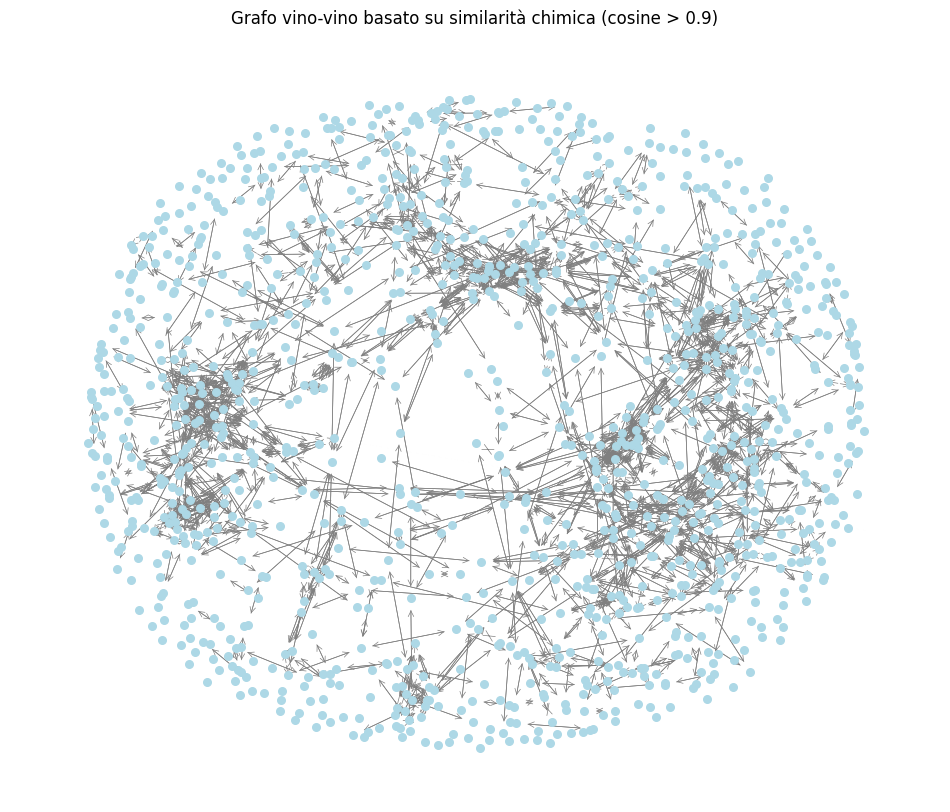

In [39]:
# Visualizzazione del grafo dei vini
plt.figure(figsize=(12, 10))

# Layout grafico
pos = nx.spring_layout(G, k=0.15, seed=42)

# Disegno nodi
nx.draw_networkx_nodes(G, pos, node_size=30, node_color="lightblue")

# Disegno archi
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, edge_color="gray", width=0.5)

# Titolo e visualizzazione
plt.title("Grafo vino-vino basato su similarità chimica (cosine > 0.9)")
plt.axis("off")
plt.show()


Il grafo che hai generato è una rappresentazione visiva della rete vino-vino, costruita sulla base della similarità chimica tra i vini del tuo dataset.

✔ Ogni nodo = un vino (identificato dal campo Id del dataset WineQT.csv)
✔ Ogni arco orientato (freccia) = un vino è simile a un altro
Condizione: la cosine similarity tra i due profili chimici > 0.9

I nodi non sono collegati a caso, ma solo se i profili chimici sono altamente compatibili

🟦 Nodi (puntini azzurri):
Rappresentano i singoli vini.

Sono uniformemente colorati (non sono codificati per quality o PageRank — si può fare dopo).

➡️ Archi (frecce grigie):
Indicano una forte somiglianza chimica dal vino di partenza (origine) al vino di arrivo (destinazione).

Poiché hai usato un grafo orientato, la freccia ha senso direzionale (vino A è simile a B, non necessariamente viceversa).

🔗 Struttura globale del grafo
✅ 1. Comunità / agglomerati visibili
In alto a sinistra, in basso a destra, ecc. noti blocchi densi di nodi: questi rappresentano gruppi di vini chimicamente simili tra loro.

Questi gruppi sono interpretabili come cluster naturali nel dominio chimico.

❗ 2. Nodi periferici
I nodi sparsi ai margini, spesso con pochi collegamenti, rappresentano vini con profili chimici unici o poco comuni.

🎯 3. Nuclei centrali
Zone molto fitte di connessioni indicano vini che sono simili a molti altri, e potrebbero essere identificati come "hub chimici".

Sono probabilmente quelli con PageRank più alto, perché ricevono molti archi da altri nodi.

Ad esempio se il vino Id = 28 ha un PageRank alto e si trova al centro di un agglomerato, significa che è un vino "rappresentativo" di quella famiglia chimica e può essere consigliato come riferimento o raccomandazione a chi ha gusti compatibili.

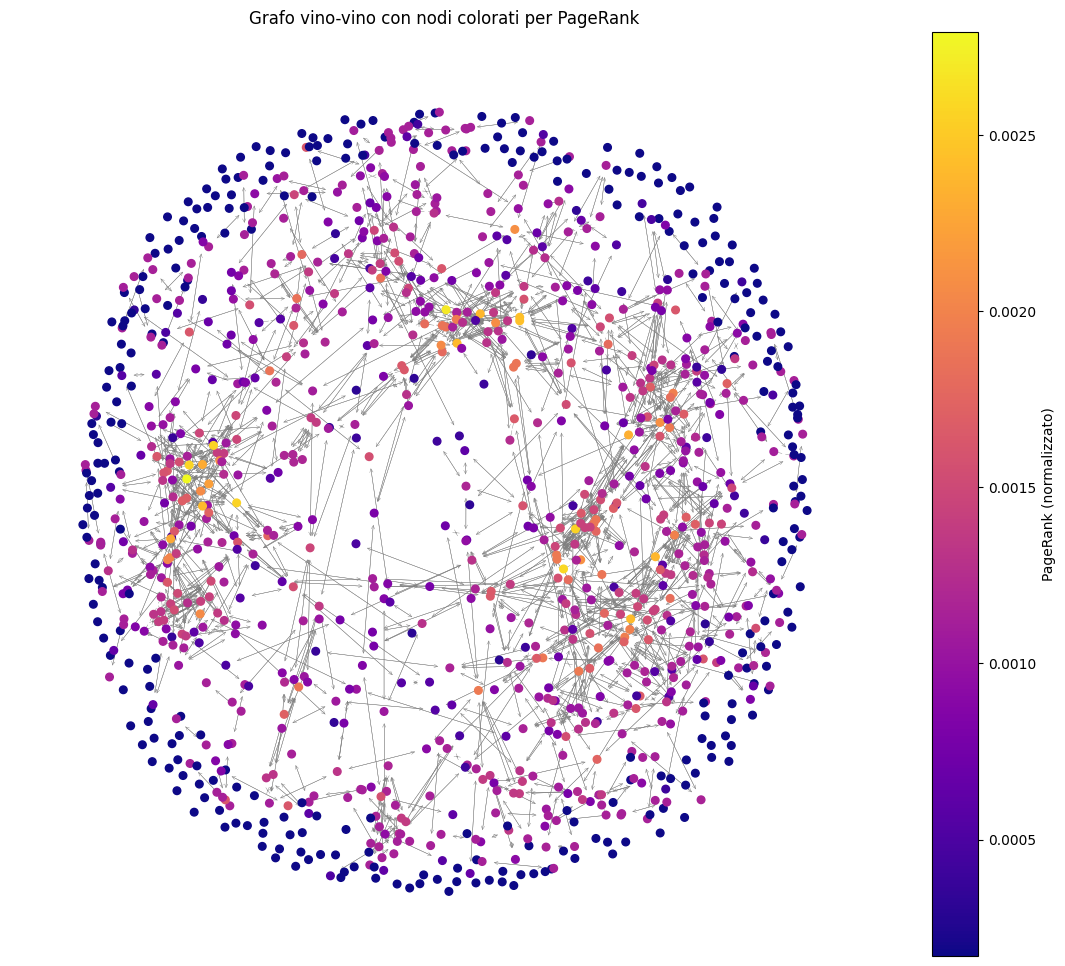

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Supponiamo che G e pagerank_scores esistano già

# Layout
pos = nx.spring_layout(G, k=0.15, seed=42)

# Valori PageRank
pr_values = np.array(list(pagerank_scores.values()))
pr_min, pr_max = pr_values.min(), pr_values.max()

# Disegno nodi (ATTENZIONE: node_color prende i valori originali, non normalizzati)
plt.figure(figsize=(14, 12))
nodes = nx.draw_networkx_nodes(
    G,
    pos,
    node_size=30,
    node_color=pr_values,
    cmap=plt.cm.plasma,
    vmin=pr_min, vmax=pr_max  # fondamentale per far funzionare la colorbar
)

# Disegno archi
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=6, edge_color="gray", width=0.3)

# Colorbar (usiamo il mappable restituito da draw_networkx_nodes)
plt.colorbar(nodes, label="PageRank (normalizzato)")

plt.title("Grafo vino-vino con nodi colorati per PageRank")
plt.axis("off")
plt.show()


🧠 Interpretazione del grafico:

I nodi più gialli (valore ≈ 1) sono i più centrali, cioè quelli con il PageRank più alto → "vini influenti" nella rete chimica.

I nodi più blu/viola sono periferici → meno simili ad altri o poco connessi.

Le aree più dense rappresentano comunità di vini molto simili chimicamente.

In [41]:
import networkx as nx
import pandas as pd

# 1. HITS: hub & authority scores
hubs, authorities = nx.hits(G, max_iter=1000, normalized=True)

# 2. PageRank (già calcolato, ma incluso per completezza)
pagerank_scores = nx.pagerank(G, alpha=0.85, weight='weight')

# 5. Creazione DataFrame riassuntivo con tutte le metriche
centrality_df = pd.DataFrame({
    "Id": list(G.nodes),
    "HITS Hub": [hubs[n] for n in G.nodes],
    "HITS Authority": [authorities[n] for n in G.nodes],
    "PageRank": [pagerank_scores[n] for n in G.nodes]
})

# Visualizzazione (puoi usare display() in Jupyter o tools se stai usando ACE)
print("Metriche di Link Analysis per ciascun vino:")
display(centrality_df.sort_values(by="PageRank", ascending=False).head(10))


Metriche di Link Analysis per ciascun vino:


,Id,HITS Hub,HITS Authority,PageRank
234,328,1.136614e-05,1.136614e-05,0.002792
781,1107,4.463366e-02,4.463366e-02,0.002691
522,732,2.630106e-11,2.630106e-11,0.002591
388,544,9.968037e-06,9.968037e-06,0.002573
20,28,3.404442e-11,3.404443e-11,0.002564
864,1224,2.263242e-05,2.263242e-05,0.002561
584,811,9.615507e-06,9.615507e-06,0.002560
668,947,4.135471e-02,4.135471e-02,0.002442
671,951,4.135471e-02,4.135471e-02,0.002442
986,1390,1.792429e-05,1.792429e-05,0.002411


Colonna	Significato
Id	Identificativo del vino nel dataset (project['Id'])
In-degree	Percentuale di vini che lo considerano simile (frequentemente raccomandato)
Out-degree	Percentuale di vini che questo vino considera simili
Betweenness	Quanto il vino fa da ponte tra gruppi diversi (più alto = vino chiave)
HITS Hub	Quanto è un hub, cioè un vino che punta a vini autorevoli
HITS Authority	Quanto è autorevole, cioè riceve collegamenti da hub
PageRank	Quanto è centrale nel grafo, considerando la struttura globale

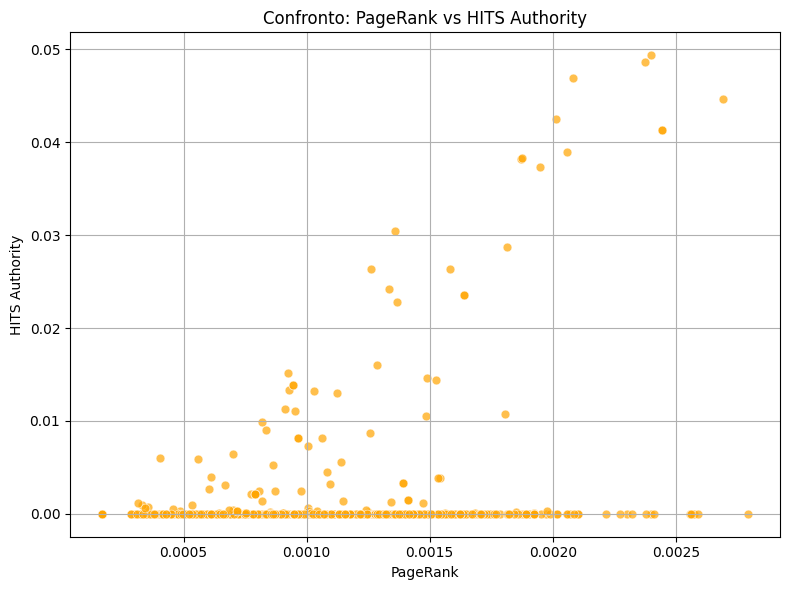

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot – PageRank vs HITS Authority
plt.figure(figsize=(8, 6))
sns.scatterplot(data=centrality_df, x="PageRank", y="HITS Authority", s=40, alpha=0.7, color="orange")
plt.title("Confronto: PageRank vs HITS Authority")
plt.xlabel("PageRank")
plt.ylabel("HITS Authority")
plt.grid(True)
plt.tight_layout()
plt.show()



✅ 1. Scatter plot – PageRank vs HITS Authority
Confronta due metriche di centralità globale:

PageRank → vini “popolari”.

HITS Authority → vini “autorevoli” nel network.

La correlazione suggerisce consistenza strutturale.



In [54]:
%pip install torch
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix
device = "cuda" if torch.cuda.is_available() else "cpu"
project = pd.read_csv("WineQT.csv")
# Supponendo che tu abbia il DataFrame df già caricato
X = project.drop("quality", axis=1)
y = project["quality"]

# Rietichettatura delle classi: Bassa, Media, Alta
y_cat = y.copy().to_numpy()

# Codifica delle classi
y_cat[y_cat <= 4] = 0           # Bassa
y_cat[(y_cat == 5) | (y_cat == 6)] = 1   # Media
y_cat[y_cat >= 7] = 2           # Alta

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dei dati
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.3, random_state=42)

# y_train e y_test ora sono già array NumPy, quindi:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Dataset e DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Definizione del modello MLP
class MLP(nn.Module):
    def __init__(self, input_size, hidden1=32, hidden2=16, output_size=3):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, output_size)
        )

    def forward(self, x):
        return self.model(x)
#la classe creata in precedenza viene assegnata all'oggetto model
model = MLP(input_size=X_train.shape[1])  # .shape[1] ritorna il numero delle colonne così che input_size abbia quel numero come neuroni di imput



Note: you may need to restart the kernel to use updated packages.


In [59]:
from collections import Counter
import torch

counts = Counter(y_train)
print(counts)  # esempio: Counter({1: 289, 2: 45, 0: 9})
total = sum(counts.values())
weights = [total / counts[i] for i in range(3)]  # 3 classi: 0, 1, 2
class_weights = torch.tensor(weights, dtype=torch.float32).to(device)


Counter({np.int64(1): 656, np.int64(2): 114, np.int64(0): 30})


In [60]:
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [61]:
y_logits = model(X_test_tensor.to(device))

In [62]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.1371,  1.8291, -0.3971],
        [-1.4525,  2.2691, -0.7949],
        [-1.7646,  2.7212, -0.7931],
        [-1.0643,  2.0782, -0.6623],
        [-0.8158,  1.2561, -0.0672]], grad_fn=<SliceBackward0>)
tensor([[0.0444, 0.8625, 0.0931],
        [0.0226, 0.9338, 0.0436],
        [0.0108, 0.9606, 0.0286],
        [0.0390, 0.9028, 0.0583],
        [0.0905, 0.7183, 0.1912]], grad_fn=<SliceBackward0>)


In [66]:
loss_train=[]
acc_train=[]
epochs=2000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        pred_labels = torch.argmax(preds, dim=1)
        correct += (pred_labels == yb).sum().item()
        total += yb.size(0)
    
    epoch_acc = 100 * correct / total
    epoch_loss = running_loss / len(train_loader)
    loss_train.append(epoch_loss)
    acc_train.append(epoch_acc)
    if epoch % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.2f}%")

# Valutazione
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = predictions.argmax(dim=1).numpy()
    true_classes = y_test_tensor.numpy()

# Report e matrice di confusione
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes))
print(f"Test Accuracy: {accuracy_score(true_classes, predicted_classes) * 100:.2f}%")

Epoch 1/2000 - Loss: 0.6721 - Accuracy: 69.62%
Epoch 51/2000 - Loss: 0.6752 - Accuracy: 68.50%
Epoch 101/2000 - Loss: 0.6557 - Accuracy: 69.62%
Epoch 151/2000 - Loss: 0.6202 - Accuracy: 70.25%
Epoch 201/2000 - Loss: 0.6210 - Accuracy: 71.25%
Epoch 251/2000 - Loss: 0.6000 - Accuracy: 70.75%
Epoch 301/2000 - Loss: 0.5939 - Accuracy: 71.62%
Epoch 351/2000 - Loss: 0.5681 - Accuracy: 74.00%
Epoch 401/2000 - Loss: 0.5436 - Accuracy: 74.25%
Epoch 451/2000 - Loss: 0.5274 - Accuracy: 75.50%
Epoch 501/2000 - Loss: 0.5221 - Accuracy: 76.25%
Epoch 551/2000 - Loss: 0.4897 - Accuracy: 76.25%
Epoch 601/2000 - Loss: 0.5051 - Accuracy: 76.62%
Epoch 651/2000 - Loss: 0.4674 - Accuracy: 77.88%
Epoch 701/2000 - Loss: 0.4382 - Accuracy: 78.25%
Epoch 751/2000 - Loss: 0.4331 - Accuracy: 78.62%
Epoch 801/2000 - Loss: 0.4369 - Accuracy: 79.38%
Epoch 851/2000 - Loss: 0.4227 - Accuracy: 80.12%
Epoch 901/2000 - Loss: 0.4032 - Accuracy: 80.50%
Epoch 951/2000 - Loss: 0.3888 - Accuracy: 80.12%
Epoch 1001/2000 - Loss:

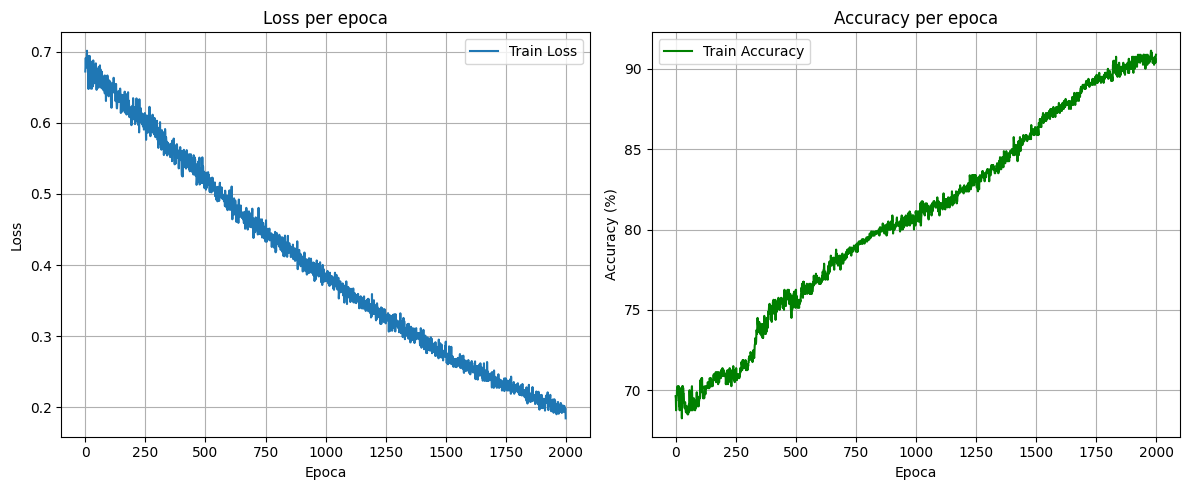

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(loss_train, label='Train Loss')
plt.title('Loss per epoca')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(acc_train, label='Train Accuracy', color='green')
plt.title('Accuracy per epoca')
plt.xlabel('Epoca')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Grazie